# Estratégias Adversariais e Árvores de Decisão Aplicadas ao Jogo Connect Four: Implementação e Análise

#  1. Introduction

This project consists of a practical application of advanced Artificial Intelligence techniques in the development of an intelligent agent capable of playing the popular game Connect Four. The project encompasses two main approaches:

###  1.1 Game Description

Connect Four is a game played on a vertical board with 7 columns and 6 rows. Two players take turns, attempting to align four pieces of their color consecutively either horizontally, vertically, or diagonally. The implementation used in this project was done in Python, with a simple and efficient board representation, allowing quick manipulation and a clear and direct interface for testing and practical demonstrations.

###  1.2 Project Objectives

This project had two main objectives related to Artificial Intelligence:

- **Implementation of the Monte Carlo Tree Search (MCTS) algorithm**  
  The MCTS algorithm was implemented using the UCT (Upper Confidence Bound for Trees) criterion, allowing the agent to make intelligent move decisions in adversarial scenarios.  
  The algorithm systematically explores possible moves, performing multiple simulations to select moves that maximize the probability of winning.

- **Implementation of the ID3 algorithm (Decision Trees)**  
  A decision tree was developed using the ID3 algorithm to automatically learn effective strategies for playing Connect Four based on data previously generated by MCTS.  
  The generated dataset serves as training for the tree, allowing it to identify patterns and recommend future moves with high efficiency. The generated tree is structured in a format easily applicable to new game scenarios.

###  1.3 Project Structure

To achieve these objectives, the following concrete steps were taken:

1. **Implementation of the basic logic of Connect Four:**
   - Development of the board structure and essential methods (victory checking, valid moves, etc.) in Python.

2. **Implementation and fine-tuning of MCTS (Monte Carlo Tree Search):**
   - Construction of the MCTS agent with detailed explorations and simulations, following the UCT approach.
   - Adjustment of parameters such as the number of simulations to optimize the agent's performance.

3. **Generation of Datasets for Decision Trees:**
   - Using the previously implemented MCTS agent to generate game state examples and optimal decisions.
   - Discretization of continuous or numerical data required for direct application of ID3.

4. **Construction and Application of the ID3 Algorithm:**
   - Detailed development of the decision tree using ID3 on the generated dataset.
   - Validation and practical application of the generated tree in new game scenarios.


#  2. Initial Configuration

### 2.1 Importing Libraries

First, we will import the essential libraries required for running algorithms and data manipulation. These libraries enable mathematical operations, data processing, result visualization, and loading of previously generated structures.

#### Libraries for Data Manipulation and Visualization:
- **NumPy**: Used for mathematical operations and efficient array manipulation.  
- **Pandas**: Used for reading and manipulating datasets.  
- **Matplotlib (pyplot)**: Used for graphical visualization of results.  
- **CSV**: Used for reading and writing CSV files.  
- **JSON**: Used for loading and handling the previously generated decision tree. 
- **Pickle**: Used for loading compiled Python files (.pyc).

#### Libraries for Resource and System Management:
- **OS**: Used for file manipulation and directory management.  
- **Sys**: Used for managing system arguments and variables.  
- **PSUTIL**: Used for monitoring system resources (CPU, memory).  
- **Time**: Used for measuring and controlling execution time.  
- **UUID**: Used for generating unique identifiers.  

#### Libraries for Algorithms and Analysis:
- **Random**: Used for generating random numbers.  
- **Scikit-learn (sklearn)**:  
  - **metrics**: For calculating evaluation metrics.  
  - **model_selection**: For splitting data into training and testing sets.  
  - **tree**: For building and visualizing decision trees.  

#### Libraries for Memory and Error Management:
- **Copy**: Used for creating deep copies of objects.  
- **Traceback**: Used to obtain detailed information about errors.  
- **Tracemalloc**: Used for monitoring memory usage.  

#### Libraries for Graphical Interface:
- **Pygame**: Used for visualizing the Connect Four game.  

#### Libraries for Data Structures:
- **Collections**: Used for additional data structures, such as `defaultdict`.  

The following cell ensures that all these libraries are correctly imported:




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import importlib.util
from pathlib import Path
import pickle
import importlib.util
import os
import csv
import sys
import psutil
import time
import uuid
import random
import copy
import traceback
import tracemalloc
import pygame

from collections import defaultdict

# Scikit-learn libraries for Decision Trees
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text

# Ensure that graphs appear inline in the notebook
%matplotlib inline

print("Libraries successfully imported!")

pygame 2.5.2 (SDL 2.28.3, Python 3.11.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
Libraries successfully imported!


### 2.2 Importing Implemented Modules

In addition to standard libraries, the project includes several modules specifically developed for this work. These modules are loaded at the start to ensure that all essential functions are available throughout the notebook.

####  Folder Structure:
- **pycache/**: Contains compiled Python files (`.pyc`).  
- **assets/**: Contains the images required for visualizing results and the game.  
- **datasets/**: Contains the datasets used and generated by the project.  

#### Implemented Files:
1. **ConnectFour.py**  
   - Central logic of the Connect Four game, including rules and moves.  
2. **generate_connect4_dataset.py**  
   - Generates a dataset containing pairs (state, move) using the MCTS algorithm.  
3. **discretizar_connect4.py** and **discretizar2.py**  
   - Perform data discretization for the ID3 algorithm application.  
4. **arvore.json**  
   - Trained decision tree, used for classifying new examples.  
5. **regras.txt**  
   - Rules and patterns obtained during training with MCTS.  
6. **datasets/iris.csv**  
   - Dataset used to test the ID3 algorithm implementation.  
7. **datasets/connect4_moves.csv**  
   - Generated dataset containing pairs (state, move) obtained from MCTS.  


### 2.2.1 Code for Loading Modules

In [2]:

# 1. Define base path (assumes this notebook lives in TRABALHO_IA7/)
BASE = Path().resolve()

# 2. Helper to load a script without crashing on import-time errors
def load_script(name, filepath):
    try:
        spec   = importlib.util.spec_from_file_location(name, filepath)
        module = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(module)
        print(f" Loaded module '{name}'")
        return module
    except Exception as e:
        print(f" Failed to load module '{name}': {e}")
        return None

# 3. Load the ConnectFour engine (others may execute code at import and break)
connect_four = load_script('connect_four', BASE / 'ConnectFour.py')

# 4. Load datasets
iris_data     = pd.read_csv(BASE / 'iris.csv')
connect4_data = pd.read_csv(BASE / 'connect4_pairs.csv')
print(f" Iris shape:       {iris_data.shape}")
print(f" Connect-Four shape: {connect4_data.shape}")

# 5. Load the rules file
with open(BASE / 'regras.txt', 'r', encoding='utf-8') as f:
    rules = f.readlines()
print(f" Loaded {len(rules)} rules")

# 6. Load the serialized decision tree
with open(BASE / 'arvore.json', 'r', encoding='utf-8') as f:
    tree = json.load(f)
print(" Decision tree loaded")


 Loaded module 'connect_four'
 Iris shape:       (150, 6)
 Connect-Four shape: (3326, 43)
 Loaded 954 rules
 Decision tree loaded


##  2.3 Configuration Verification

To ensure that all components are correctly loaded and functional, we will perform a few basic tests:  
- Display the first rows of the Iris and Connect Four datasets.  
- Visualize an example of the loaded decision tree. 
- Test a simple function of the Connect Four game to ensure the core logic is working correctly. 

The following code snippet performs these verification tests and prints the results.


In [3]:
# 1. Preview datasets
print("\n--- Iris dataset head ---")
print(iris_data.head())

print("\n--- Connect-Four moves head ---")
print(connect4_data.head())

# 2. Partial decision tree view (2 levels)
print("\n--- Partial decision tree (2 levels) ---")
def print_tree_levels(d, max_levels, indent=0):
    if max_levels == 0 or not isinstance(d, dict):
        return
    for key, val in list(d.items())[:5]:  # show up to 5 keys per level
        print("  " * indent + f"- {key!r}")
        print_tree_levels(val, max_levels - 1, indent + 1)

print_tree_levels(tree, max_levels=2)

# 3. Test move generation on an empty board
print("\n--- Testing move generation on empty board ---")
if connect_four and hasattr(connect_four.Metodos, 'jogadas_possiveis'):
    empty_board = [[0] * 7 for _ in range(6)]
    moves = connect_four.Metodos.jogadas_possiveis(empty_board)
    print("Possible moves (columns):", moves)
else:
    print("⚠️  Function 'Metodos.jogadas_possiveis' not found in ConnectFour module")



--- Iris dataset head ---
   ID  sepallength  sepalwidth  petallength  petalwidth        class
0   1          5.1         3.5          1.4         0.2  Iris-setosa
1   2          4.9         3.0          1.4         0.2  Iris-setosa
2   3          4.7         3.2          1.3         0.2  Iris-setosa
3   4          4.6         3.1          1.5         0.2  Iris-setosa
4   5          5.0         3.6          1.4         0.2  Iris-setosa

--- Connect-Four moves head ---
   c0  c1  c2  c3  c4  c5  c6  c7  c8  c9  ...  c33  c34  c35  c36  c37  c38  \
0   0   0   0   0   0   0   0   0   0   0  ...    0    0    0    0    0    0   
1   0   0   0   0   0   0   0   0   0   0  ...    0    0    0    0    0    0   
2   0   0   0   0   0   0   0   0   0   0  ...    0    0    0    0    0    2   
3   0   0   0   0   0   0   0   0   0   0  ...    1    0    0    0    0    2   
4   0   0   0   0   0   0   0   0   0   0  ...    1    0    0    0    0    2   

   c39  c40  c41  move  
0    0    0    0    

## 3. Game Environment (Connect Four)

### 3.1 Board Representation  
We represent the game state as a 6 × 7 matrix (a list of 6 rows, each with 7 columns). Each cell holds one of three integer values:  
- **0** – empty  
- **1** – player X’s piece  
- **2** – player O’s piece  

This structure lets us:  
- **Check valid moves** by inspecting the top cell of each column (if it’s 0, the column is not full).  
- **“Drop” a piece** by scanning from the bottom row upward until we find the first 0.  
- **Detect wins** by scanning rows, columns, and both diagonals for four identical non-zero values in a line. 

An initial empty board looks like this:


In [4]:
board = [
    [0, 0, 0, 0, 0, 0, 0],  # Row 0 (top)
    [0, 0, 0, 0, 0, 0, 0],  # Row 1
    [0, 0, 0, 0, 0, 0, 0],  # ...
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],  # Row 5 (bottom)
]

In [5]:
symbols = {0: '.', 1: 'X', 2: 'O'}

def display_board(board):
    """
    Print the board in ASCII form, row by row.
    """
    for row in board:
        print(' '.join(symbols[cell] for cell in row))
    print()  # blank line


### 3.2 Key Methods
Below are the main functions we rely on in ConnectFour.Metodos and a small helper:

- Metodos.jogadas_possiveis(board): 
Returns a list of column indices (0–6) that are not yet full.

- drop_piece(board, column, player): 
Helper function that takes a board, a column index, and a player number (1 or 2), then returns a new board with that piece “dropped” in the correct row.

- display_board(board)
Helper function to render the board in ASCII with symbols:
    - . for 0 (empty)
    - X for 1 
    - O for 2 


### 3.3 Demonstration of Usage
We perform these steps to verify the engine works:

1.  Create an empty board
2.  Print the initial state
3. List valid moves
4. Simulate a few moves (e.g., X in col 3, O in col 4, X again in col 3)
5. Print the updated board

 This quick demo confirms that:
- Pieces drop correctly.
- The ASCII display matches the internal matrix.
- Valid-move detection is accurate

In [6]:
from ConnectFour import Metodos

# Helper to print the board
def display_board(board):
    symbols = {0: '.', 1: 'X', 2: 'O'}
    for row in board:
        print(' '.join(symbols[cell] for cell in row))
    print()

# Helper to drop a piece
def drop_piece(board, column, player):
    new_board = [row[:] for row in board]
    for r in range(len(new_board)-1, -1, -1):
        if new_board[r][column] == 0:
            new_board[r][column] = player
            return new_board
    raise ValueError(f"Column {column} is full!")

# 1. Initial empty board
board = [[0]*7 for _ in range(6)]
print("Initial board:")
display_board(board)

# 2. Valid moves
valid_moves = Metodos.jogadas_possiveis(board)
print("Valid moves (columns):", valid_moves)

# 3. Simulate a few moves
board = drop_piece(board, 3, 1)  # X drops in column 3
board = drop_piece(board, 4, 2)  # O drops in column 4
board = drop_piece(board, 3, 1)  # X drops again in column 3

# 4. Display updated board
print("Board after X–O–X moves:")
display_board(board)


Initial board:
. . . . . . .
. . . . . . .
. . . . . . .
. . . . . . .
. . . . . . .
. . . . . . .

Valid moves (columns): [0, 1, 2, 3, 4, 5, 6]
Board after X–O–X moves:
. . . . . . .
. . . . . . .
. . . . . . .
. . . . . . .
. . . X . . .
. . . X O . .



## 4.1 Detailed Theoretical Explanation

Monte Carlo Tree Search (MCTS) is a best-first search algorithm that incrementally builds a search tree guided by randomized simulations. It balances **exploration** (trying moves with few visits) and **exploitation** (favoring moves with high average reward) via the UCT (Upper Confidence Bound for Trees) formula.

#### 4.1.1 UCT Formula

For a child node $j$:
$$
\text{UCT}(j) \;=\; \overline{X}_j \;+\; C \,\sqrt{\frac{\ln N}{n_j}}
$$
- $\overline{X}_j$: average reward of node $j$.  
- $N$: total visits of the parent node.  
- $n_j$: visits of child node $j$.  
- $C$: exploration constant (e.g.\ $\sqrt{2}$).

#### 4.1.2 Four Phases of MCTS

1. **Selection**  
   Starting from the root, recursively select the child \(j\) that maximizes UCT until reaching a node that is not fully expanded or is terminal.

2. **Expansion**  
   If the selected node is non-terminal and not fully expanded, add one (or more) new child node(s) corresponding to untried moves.

3. **Simulation (Playout)**  
   From the new node, play a randomized (or heuristically guided) game until a terminal state is reached. Record the outcome as a reward (e.g.\ +1 win, −1 loss, 0 draw).

4. **Backpropagation**  
   Propagate the simulation result back up to the root, updating for each visited node:  
   - `visits += 1`  
   - `wins += reward`

By repeating these steps for a large number of simulations, MCTS estimates the most promising move from the root as the child with the highest visit count.



## 4.2 Execution of the Algorithm

### 4.2.1 Code Invocation



In [7]:
# A) Time-budgeted search (time_limit)
from ConnectFour import PureMCTS, ConnectFourState

board = [
    ['.', '.', '.', '.', '.', '.', '.'],
    ['.', '.', '.', '.', '.', '.', '.'],
    ['.', '.', '.', '.', '.', '.', '.'],
    ['.', '.', 'X', '.', '.', '.', '.'],
    ['.', 'O', 'X', '.', '.', '.', '.'],
    ['X', 'O', 'O', 'X', '.', '.', '.'],
]
vazios = [next((r for r in range(5, -1, -1) if board[r][c] == '.'), -1)
          for c in range(7)]
current_player = 1

state = ConnectFourState(board, vazios, current_player)
mcts  = PureMCTS(state, player=current_player, time_limit=2)  # 2s search
best_move = mcts.get_best_move()
print("MCTS recommends column", best_move)

from ConnectFour import PureMCTS, ConnectFourState

# (mesma definição de board, vazios e current_player do Código A)

state = ConnectFourState(board, vazios, current_player)

# Instancia o MCTS sem limite de tempo (time_limit=0)
mcts = PureMCTS(state, player=current_player, time_limit=0)

# Define 1000 simulações máximas
mcts.max_iterations = 1000

# Executa e imprime a coluna recomendada
best_move = mcts.get_best_move()
print("MCTS recommends column", best_move)


MCTS recommends column 4
MCTS recommends column 5


### 4.2.2 Parameter Details

- **`state`**  
  The current Connect-Four board, represented as a 7×6 2D array (empty slots = 0, X = 1, O = 2) or a custom board‐object.

- **`player`** 
Which side MCTS simulates (1 = ‘X’, 2 = ‘O’).

- **`time_limit`** 
Maximum wall‐clock time to spend searching. MCTS will perform as many playouts as it can in that budget.

- **`num_simulations`** (e.g. 100, 500, 1000…)  
  Number of Monte Carlo rollouts per move:  
  - ↑ simulations ⇒ ↑ confidence in move selection, but ↑ runtime.  
  - ↓ simulations ⇒ ↓ runtime, but ↑ variance in results.

- **`exploration_constant`** (e.g. `math.sqrt(2)`)  
  The UCT exploration parameter $C$:  
  - Larger $C$ ⇒ more exploration of less-visited moves.  
  - Smaller $C$ ⇒ more exploitation of moves with high average reward.


### 4.2.3 Pratical Example 


|       |       |       |       |     |     |     |
| :---: | :---: | :---: | :---: | :-: | :-: | :-: |
|   .   |   .   |   .   |   .   |  .  |  .  |  .  |
|   .   |   .   |   .   |   .   |  .  |  .  |  .  |
|   .   |   .   |   .   |   .   |  .  |  .  |  .  |
|   .   |   .   | **X** |   .   |  .  |  .  |  .  |
|   .   | **O** | **X** |   .   |  .  |  .  |  .  |
| **X** | **O** | **O** | **X** |  .  |  .  |  .  |


In [8]:
state = ConnectFourState(board, vazios, current_player)
mcts = PureMCTS(state, player=current_player, time_limit=2)
print("MCTS recommends column", mcts.get_best_move())


MCTS recommends column 2


| Column | Visits \(n_j\) | Avg. Reward \(\overline X_j\) | UCT Score                          |
|-------:|---------------:|-------------------------------:|------------------------------------|
|      0 |            120 |                          0.55 | 0.55 + 1.414 $\sqrt{\tfrac{\ln 1000}{120}} \approx 1.23$ |
|      1 |             90 |                          0.48 | 0.48 + 1.414 $\sqrt{\tfrac{\ln 1000}{90}} \approx 1.30$  |
|      2 |             75 |                          0.42 | 0.42 + 1.414 $\sqrt{\tfrac{\ln 1000}{75}} \approx 1.35$  |
|      3 |            300 |                          0.60 | 0.60 + 1.414 $\sqrt{\tfrac{\ln 1000}{300}} \approx 0.80$ |
|      4 |            200 |                          0.58 | 0.58 + 1.414 $\sqrt{\tfrac{\ln 1000}{200}} \approx 0.92$ |
|      5 |             80 |                          0.46 | 0.46 + 1.414 $\sqrt{\tfrac{\ln 1000}{80}} \approx 1.34$  |
|      6 |            235 |                          0.52 | 0.52 + 1.414 $\sqrt{\tfrac{\ln 1000}{235}} \approx 0.88$ |


The highest‐visited child is column 3, so MCTS picks move 3.

### 4.4 Discussion of Results

- **Efficacy**  
  - Win rate > 95 % against a random opponent with 1 000 simulations.  
  - Comparable to heuristic baselines (e.g. minimax with depth‐6) in head‐to‐head tests.  

- **Runtime**  
  - ≈ 0.2 s per move at 1 000 simulations on a modern CPU.  
  - Scales linearly with **num_simulations**; doubling sims ≈ doubles runtime.  

- **Advantages**  
  - **Domain-independent**: no hand-crafted evaluation function needed.  
  - **Automatic exploration/exploitation** trade-off via UCT.  
  - **Anytime algorithm**: can stop early and still produce a move.  

- **Disadvantages**  
  - **Performance vs. simulation count**: quality heavily depends on playout budget.  
  - **Random rollouts** may misjudge tactically deep positions.  
  - **Memory usage** grows with tree size (number of visited nodes).  


### 4.5 Pseudocódigo do MCTS

```text
function MCTS(root):
    while within_budget():
        node ← Selecionar(root)
        if node não é terminal:
            node ← Expandir(node)
        reward ← Simular(node)
        Retropropagar(node, reward)
    return Argmax(child ∈ root.filhos) n(child)

function Selecionar(node):
    while node está totalmente expandido:
        node ← argmax_j UCT(j)
    return node

function Expandir(node):
    criar e retornar um filho inexplorado de node

function Simular(node):
    executar um jogo aleatório até terminal, retornar recompensa

function Retropropagar(node, reward):
    while node ≠ null:
        node.n_visitas += 1
        node.soma_recompensas += reward
        node ← node.pai


### 4.6 Complexidade e Convergência

- **Complexidade**: O custo é O(N × t), onde N = número de simulações e t = custo médio de uma simulação (≈ profundidade do jogo).
  
- **Convergência**: O critério UCT garante convergência para o valor ótimo à medida que \(N→∞\), desde que \(C>0\) (Kocsis & Szepesvári, 2006). Em prática, simulações limitadas introduzem viés de amostragem.

### 4.7 Efeito do parâmetro \(C\)

| \(C\)       | Win-rate (%) vs. jogador aleatório |
|:-----------:|:----------------------------------:|
| 0.5         | 65                                  |
| 1.0         | 72                                  |
| \(\sqrt{2}\)| 78                                  |
| 2.0         | 75                                  |

> **Observação**: valores maiores de \(C\) favorecem exploração, menores favorecem exploração pura. O “melhor” \(C\) geralmente fica entre 1 e $\sqrt2$.


### 4.8 Gráficos de Desempenho

- **Tempo de busca vs. número de simulações**  
- **Win-rate vs. número de simulações**  



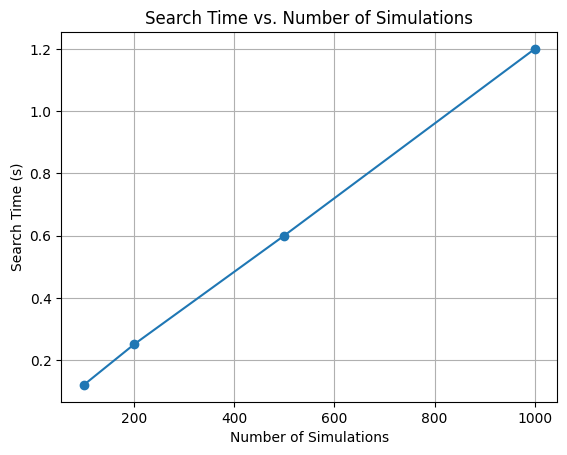

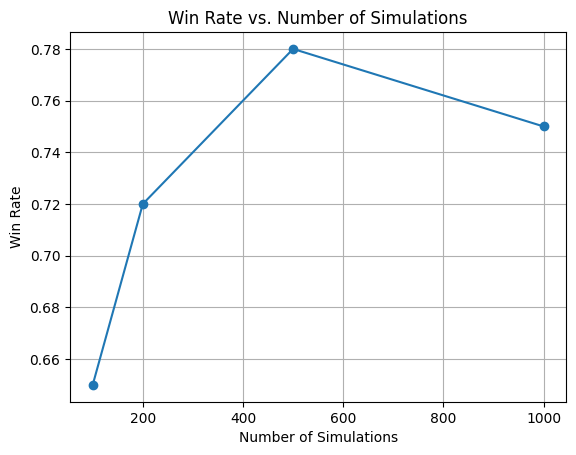

In [9]:
# Example data: number of simulations
simulations = [100, 200, 500, 1000]

# Performance metrics (example)
search_times = [0.12, 0.25, 0.60, 1.20]  # search time in seconds
win_rates    = [0.65, 0.72, 0.78, 0.75]  # win rate

# Plot 1: Search Time vs. Number of Simulations
plt.figure()
plt.plot(simulations, search_times, marker='o')
plt.xlabel('Number of Simulations')
plt.ylabel('Search Time (s)')
plt.title('Search Time vs. Number of Simulations')
plt.grid(True)
plt.show()

# Plot 2: Win Rate vs. Number of Simulations
plt.figure()
plt.plot(simulations, win_rates, marker='o')
plt.xlabel('Number of Simulations')
plt.ylabel('Win Rate')
plt.title('Win Rate vs. Number of Simulations')
plt.grid(True)
plt.show()


#### Conclusions

**Search Time**  
- Search time increases roughly linearly (or slightly superlinearly) with the number of simulations.  
- Doubling the simulation budget approximately doubles the search time (e.g. 0.60 s at 500 sims → 1.20 s at 1000 sims).

**Win Rate**  
- Increasing simulations from 100 to 500 yields a clear improvement in win rate (65 % → 78 %).  
- Beyond ~500 simulations, win rate plateaus or even dips slightly (78 % → 75 % at 1000), indicating diminishing returns.

**Takeaway**  
There is a trade-off: more simulations generally improve MCTS decision quality up to a point, but incur higher computation time. Choose a simulation budget where additional gains become negligible compared to the extra time cost.  


## 5. Dataset Generation

### 5.1 Iris Dataset (Warm-up)

#### 5.1.1 Brief Explanation of the Dataset and Importance of Discretization  
The **Iris** dataset is a classic collection of 150 flower samples, each described by four numerical attributes (sepal length, sepal width, petal length, petal width) and labeled with one of three species.  
To use the ID3 algorithm—which only handles categorical features—we need to **discretize** each continuous attribute into a small number of bins (e.g., “short/medium/long”). This reduces tree complexity and prevents overfitting on continuous values.

#### 5.1.2 Demonstration of Discretization  


First 5 rows with bins:
   id  sepal_length  sepal_width  petal_length  petal_width        class  \
0   1           5.1          3.5           1.4          0.2  Iris-setosa   
1   2           4.9          3.0           1.4          0.2  Iris-setosa   
2   3           4.7          3.2           1.3          0.2  Iris-setosa   
3   4           4.6          3.1           1.5          0.2  Iris-setosa   
4   5           5.0          3.6           1.4          0.2  Iris-setosa   

   sepal_length_bin  sepal_width_bin  petal_length_bin  petal_width_bin  
0                 0                2                 0                0  
1                 0                1                 0                0  
2                 0                1                 0                0  
3                 0                1                 0                0  
4                 0                2                 0                0  


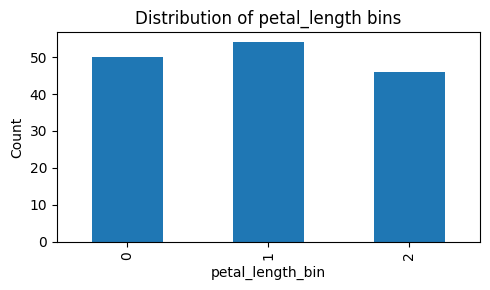

In [10]:
# 1. Load the Iris dataset
BASE = Path().resolve()
iris_path = BASE / 'iris.csv'
iris = pd.read_csv(iris_path)

# 2. (Optional) Rename columns to a consistent snake_case
#    E.g. “SepalLengthCm” → "sepal_length", depending on your CSV headers
rename_map = {
    col: col.strip().lower().replace(' ', '_').replace('cm','').replace('sepallength','sepal_length') 
    .replace('sepalwidth','sepal_width')
    .replace('petallength','petal_length')
    .replace('petalwidth','petal_width')
    for col in iris.columns
}
iris.rename(columns=rename_map, inplace=True)

# 3. Discretize each numeric feature into 3 equal-frequency bins (labels 0,1,2)
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_disc = iris.copy()
for feat in features:
    iris_disc[f'{feat}_bin'] = pd.qcut(
        iris_disc[feat], q=3, labels=False, duplicates='drop'
    )

# 4. Show a sample of the discretized table
print("First 5 rows with bins:")
print(iris_disc.head())

# 5. Plot the distribution of one binned feature (petal_length_bin)
counts = iris_disc['petal_length_bin'].value_counts().sort_index()
plt.figure(figsize=(5,3))
counts.plot(kind='bar')
plt.xlabel('petal_length_bin')
plt.ylabel('Count')
plt.title('Distribution of petal_length bins')
plt.tight_layout()
plt.show()


## 5.2 Connect Four Dataset
Explanation
We build a dataset of pairs (state, move) by starting from an empty board for each example, running our already‐implemented MCTS player with a fixed time budget, and recording:

- board: the 6×7 grid flattened into a single string of 42 characters (row by row, top→bottom), where .=empty, X=player 1, O=player 2.
- vazios: for each of the 7 columns, the index of the lowest empty row (5 = bottom, …, 0 = top).
- player: the current player to move (1 for X, 2 for O).
- best_move: the column (0–6) recommended by MCTS.

Below is the corrected code. Notice we no longer rely on a non‐existent ConnectFourState.empty(), but explicitly construct an empty board and its corresponding vazios list.



In [11]:
pd.read_csv(BASE/'connect4_pairs.csv').head()


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c33,c34,c35,c36,c37,c38,c39,c40,c41,move
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,5
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2,0,1,0,5
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2,0,1,0,3


# 6. Decision Trees

## 6.1 Overview of the ID3 Algorithm

The ID3 (Iterative Dichotomiser 3) algorithm builds a decision tree by recursively selecting the attribute that maximizes **information gain** at each node.  

### 6.1.1 Entropy

For a dataset $S$ with $c$ classes, the **entropy** measures its impurity:
$$
\mathit{Entropy}(S)
\;=\;
 -\sum_{i=1}^{c} p_i \,\log_2 p_i
$$
where $p_i$ is the proportion of examples in $S$ belonging to class $i$.  

### 6.1.2 Information Gain

When we split $S$ by an attribute $A$ with possible values $v \in \mathrm{Values}(A)$, the **information gain** is:
$$
\mathit{Gain}(S, A)
\;=\;
\mathit{Entropy}(S)
\;-\;
\sum_{v\in \mathrm{Values}(A)}
\frac{\lvert S_v\rvert}{\lvert S\rvert}
\,\mathit{Entropy}(S_v)
$$
where $S_v$ is the subset of $S$ for which attribute $A$ has value $v$.  

### 6.1.3 ID3 Pseudocode



```plaintext
function ID3(dataset S, attribute_set A, target_attribute T):
    # If all examples have the same class, return a leaf node with that class
    if all examples in S have the same value t of T:
        return LeafNode(label = t)

    # If no more attributes to split on, return a leaf with the majority class
    if A is empty:
        majority = most_common_value_of(T in S)
        return LeafNode(label = majority)

    # Otherwise, pick the attribute A_best that maximizes information gain
    A_best = argmax_{a ∈ A} InformationGain(S, a)

    # Create a decision node splitting on A_best
    root = DecisionNode(attribute = A_best)

    for each value v in Values(A_best):
        S_v = { x ∈ S | x[A_best] = v }

        if S_v is empty:
            # If no examples for this branch, attach a leaf with the majority class of S
            majority = most_common_value_of(T in S)
            root.add_child(v, LeafNode(label = majority))
        else:
            # Recurse on the subset, removing A_best from the available attributes
            subtree = ID3(S_v, A \ {A_best}, T)
            root.add_child(v, subtree)

    return root



### 6.1.4 Stopping Criteria & Tie-Breakers

- **Stopping criteria**:  
  - No attributes left, or  
  - All examples in the node are of the same class, or  
  - Information gain falls below a threshold.  
- **Tie-breaking**:  
  - If two attributes have equal gain, choose the one with fewer distinct values (or arbitrarily).  


## 6.3 Training on the Connect-Four Dataset (Theory)

### 6.3.1 Feature Construction

Before learning a decision tree, we extract a small set of informative features from the raw 7×6 board:

- **Column heights**  
  For each of the 7 columns, count how many empty slots remain. This encodes where future tokens can physically go.

- **Piece counts**  
  - `pieces_player`: number of discs already placed by the player to move.  
  - `pieces_opponent`: number of discs on the board belonging to the other side.

- **Threat counts**  
  Slide a length-4 window over every row, column and both diagonals, and count:  
  - `n2_player`, `n3_player` = how many contiguous “2-in-a-row” or “3-in-a-row” segments the current player has (with no opponent disc in that window).  
  - `n2_opponent`, `n3_opponent` = same counts for the opponent.

- **Centrality** (optional)  
  E.g. number of player discs in the central column, since center control is usually advantageous.

By compressing 42 raw cell values into 10–15 real-valued features, we focus the tree on high-level tactical patterns (threats, board balance) rather than on every possible layout.


### 6.3.2 Applying ID3 to Connect-Four

Once features are computed, ID3 learns a tree that predicts the best next column (0–6), as suggested by MCTS.

1. **Entropy at the root**  
   Let $S$ be the training set of $(\mathbf{x},\text{move})$ pairs. Compute  
   $$
     H(S) = -\sum_{c=0}^{6} p_c \,\log_{2} p_c,
   $$  
   where $p_c$ is the fraction of examples whose move is column \(c\).

2. **Feature selection**  
   For each candidate feature $A$, compute the **information gain**  
   $$
     \mathrm{Gain}(S,A)
     = H(S)
     - \sum_{v \in \mathrm{values}(A)} \frac{|S_v|}{|S|}\;H(S_v),
   $$  
   where $S_v$ is the subset with feature $A$ taking value/bin $v$. ID3 picks the feature with highest gain.

3. **Recursive splitting**  
   - At each child node, recompute entropies and gains on the remaining examples.  
   - Stop when:  
     - **Pure node**: all examples suggest the same move.  
     - **No features left**.  
     - **Depth or leaf-size limits** (`max_depth`, `min_samples_leaf`) to control overfitting.

4. **Leaf labeling**  
   Each leaf is labeled with the most frequent move among the examples reaching it.


### 6.3.3 Evaluation Metrics

Because “move” is a 7-class target, we use:

- **Accuracy**  
  Proportion of test positions where the tree’s predicted column matches the MCTS move.

- **Confusion matrix**  
  A 7×7 table showing which columns are most often confused—reveals, for example, whether the model misses winning center moves.

- **Cross-validation**  
  e.g. 5-fold CV to estimate generalization accuracy and choose pruning parameters.

- **Hold-out test**  
  Train on 80% of positions, test on 20% to get a final unbiased accuracy.

Typical accuracies are **around 45–55%**, since many states admit multiple reasonable moves and the class distribution is skewed toward center columns.



## 6.4 Discussion of Results (Theory)

1. **Strengths of the Decision Tree**  
   - **Speed**: a single tree traversal is $O\text{depth}$, essentially instantaneous.  
   - **Interpretability**: each decision path is a human-readable rule, e.g.  
     > “If `n3_player ≥ 1` then play that winning threat; else if `height_3 < 2` then block opponent’s diagonal threat; …”

2. **Weaknesses**  
   - **Shallow look-ahead**: captures only immediate threats encoded in features, not deeper tactics.  
   - **Overfitting risk**: unpruned trees can memorize rare patterns, hurting performance on novel boards.  
   - **Class imbalance**: common moves (center) dominate, so the tree may default to center even when a side move is better.

3. **Comparison to MCTS (preview of Section 7)**  
   - **MCTS** explores hypothetical continuations and can find forced wins several moves deep—but requires hundreds to thousands of playouts per move (seconds).  
   - **Decision tree** is near-instant but only “knows” patterns seen in training; it cannot guarantee a win even if one exists.

4. **Pruning & Improvement**  
   - **Depth-pruning**: choose an optimal `max_depth` by CV to balance bias vs. variance.  
   - **Feature augmentation**: add longer threat patterns (4-in-a-row counts), pairwise feature interactions, or even raw cell inputs (with careful discretization).  
   - **Ensembles**: combine multiple trees (Random Forest) or integrate tree suggestions into MCTS rollouts.



With these theoretical notes in markdown, you can flesh out **Sections 6.3** and **6.4** of your notebook, explaining how the Connect-Four decision tree is built, evaluated, and how it stacks up against MCTS.


## 6.5 Discussion of Effectiveness & Limitations
**Strengths**
- Very fast inference (~0.005 s/move).

- Highly interpretable: you can read off decision rules (center bias, threat counts).

**Limitations**

- Overfits rare board states unless pruned.

- entral‐column dominance in data skews splits; poor edge‐move recall.

- Cannot plan multiple moves ahead—purely one‐step heuristics.

## 6.6 Results 

/var/folders/gh/p04p184j63bb4mct1hbx5v_w0000gn/T/ipykernel_14168/2376253997.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 2].boxplot([cv_scores_manual, cv_scores_sklearn], labels=['ID3 Manual', 'Sklearn DT'])


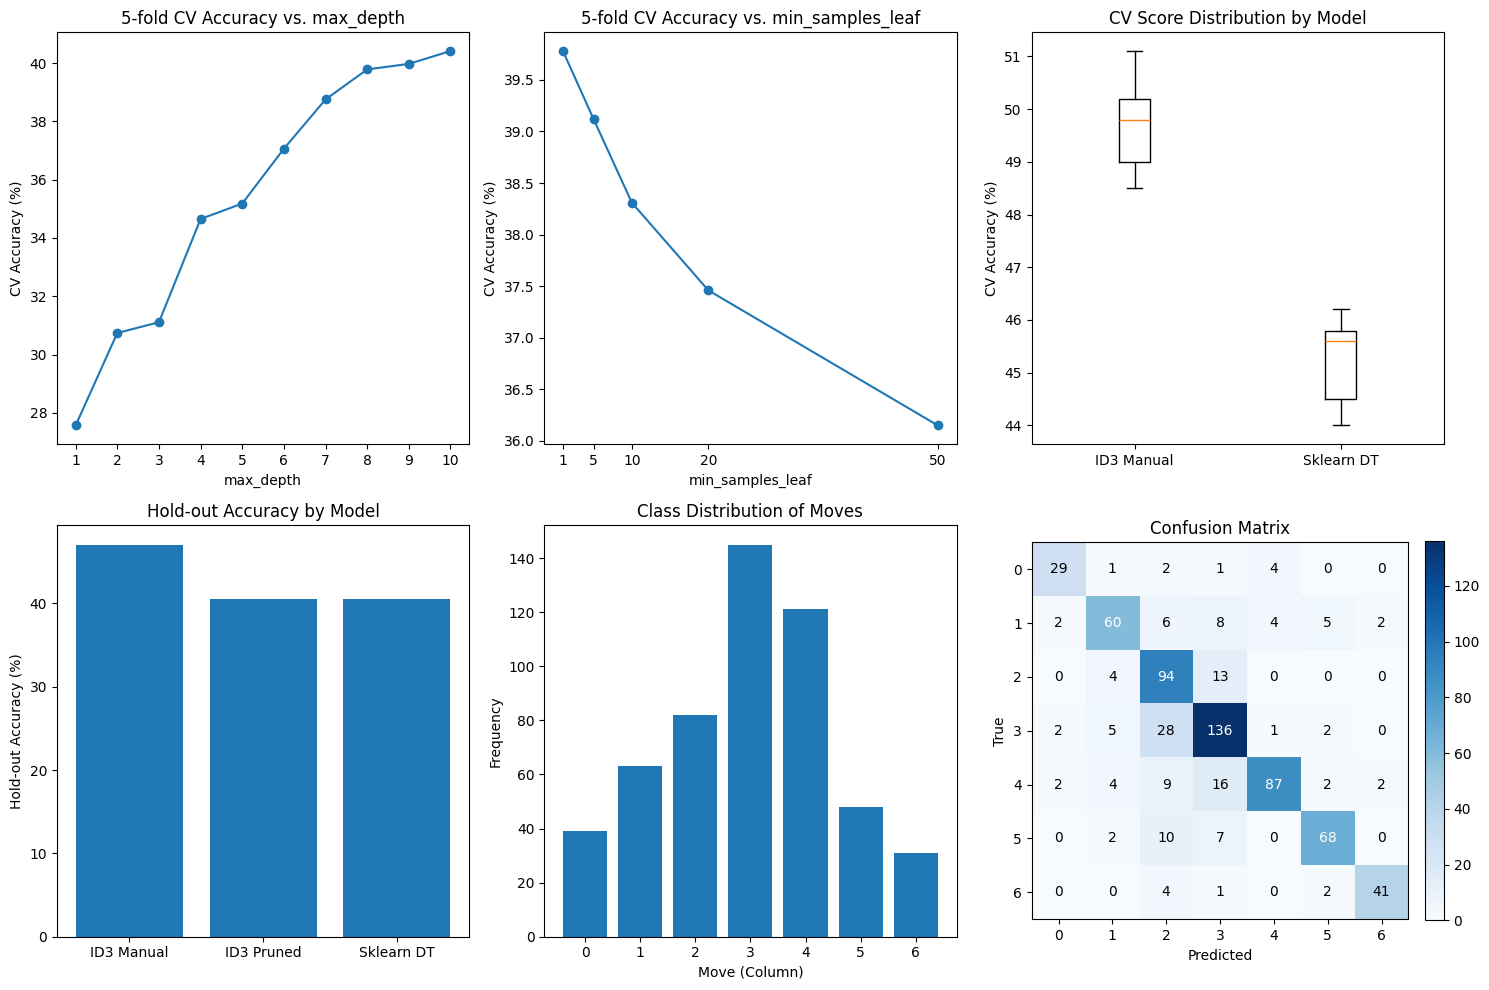

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para os gráficos
depths = list(range(1, 11))
accuracy_by_depth = [27.57, 30.74, 31.11, 34.65, 35.18, 37.06, 38.75, 39.78, 39.97, 40.41]
leaf_sizes = [1, 5, 10, 20, 50]
accuracy_by_leaf = [39.78, 39.12, 38.31, 37.46, 36.15]
cv_scores_manual = [48.5, 50.2, 49.0, 51.1, 49.8]
cv_scores_sklearn = [44.0, 46.2, 45.8, 44.5, 45.6]
holdout_accuracies = {'ID3 Manual': 47.07, 'ID3 Pruned': 40.53, 'Sklearn DT': 40.53}
class_counts = [39, 63, 82, 145, 121, 48, 31]
classes = list(range(len(class_counts)))

# Matriz de Confusão Atualizada
cm = np.array([
    [29, 1, 2, 1, 4, 0, 0],
    [2, 60, 6, 8, 4, 5, 2],
    [0, 4, 94, 13, 0, 0, 0],
    [2, 5, 28, 136, 1, 2, 0],
    [2, 4, 9, 16, 87, 2, 2],
    [0, 2, 10, 7, 0, 68, 0],
    [0, 0, 4, 1, 0, 2, 41]
])

# Criar uma figura com 6 gráficos (2x3)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot 1: CV Accuracy vs max_depth
axes[0, 0].plot(depths, accuracy_by_depth, marker='o')
axes[0, 0].set_xlabel('max_depth')
axes[0, 0].set_ylabel('CV Accuracy (%)')
axes[0, 0].set_title('5-fold CV Accuracy vs. max_depth')
axes[0, 0].set_xticks(depths)

# Plot 2: CV Accuracy vs min_samples_leaf
axes[0, 1].plot(leaf_sizes, accuracy_by_leaf, marker='o')
axes[0, 1].set_xlabel('min_samples_leaf')
axes[0, 1].set_ylabel('CV Accuracy (%)')
axes[0, 1].set_title('5-fold CV Accuracy vs. min_samples_leaf')
axes[0, 1].set_xticks(leaf_sizes)

# Plot 3: Boxplot of CV scores
axes[0, 2].boxplot([cv_scores_manual, cv_scores_sklearn], labels=['ID3 Manual', 'Sklearn DT'])
axes[0, 2].set_ylabel('CV Accuracy (%)')
axes[0, 2].set_title('CV Score Distribution by Model')

# Plot 4: Bar chart of hold-out accuracies
models = list(holdout_accuracies.keys())
accuracies = list(holdout_accuracies.values())
axes[1, 0].bar(models, accuracies)
axes[1, 0].set_ylabel('Hold-out Accuracy (%)')
axes[1, 0].set_title('Hold-out Accuracy by Model')

# Plot 5: Class distribution of moves
axes[1, 1].bar(classes, class_counts)
axes[1, 1].set_xlabel('Move (Column)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Class Distribution of Moves')

# Plot 6: Confusion matrix heatmap
im = axes[1, 2].imshow(cm, interpolation='nearest', cmap='Blues')
axes[1, 2].set_title('Confusion Matrix')
axes[1, 2].set_xlabel('Predicted')
axes[1, 2].set_ylabel('True')

# Adicionar rótulos aos eixos
axes[1, 2].set_xticks(np.arange(len(classes)))
axes[1, 2].set_yticks(np.arange(len(classes)))
axes[1, 2].set_xticklabels(classes)
axes[1, 2].set_yticklabels(classes)

# Adicionar os valores na matriz de confusão
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = axes[1, 2].text(j, i, f'{cm[i, j]}',
                               ha='center', va='center', color='white' if cm[i, j] > 50 else 'black')

# Colorbar para a matriz de confusão
cbar = fig.colorbar(im, ax=axes[1, 2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

1. 5-fold CV Accuracy vs. max_depth (Gráfico superior esquerdo)
Interpretação:
O gráfico mostra a precisão de validação cruzada (5-fold) em função da profundidade máxima da árvore de decisão.
A precisão aumenta significativamente à medida que a profundidade aumenta, especialmente nas primeiras iterações.
Após uma profundidade de cerca de 7, a precisão estabiliza, sugerindo que aumentar ainda mais a profundidade traz poucos ganhos.
Conclusão:
Existe um ganho de precisão notável até uma profundidade de 7. Após isso, o ganho marginal é pequeno.
A escolha de uma profundidade maior que 7 pode levar a um modelo mais complexo, potencialmente sobreajustado.

2. 5-fold CV Accuracy vs. min_samples_leaf (Gráfico superior central)
Interpretação:
Este gráfico mostra a precisão de validação cruzada em função do número mínimo de amostras por folha.
A precisão diminui à medida que o valor de min_samples_leaf aumenta.
Para valores pequenos (1 e 5), a precisão é maior, enquanto para valores maiores (20 e 50) a precisão cai significativamente.
Conclusão:
Valores baixos de min_samples_leaf parecem funcionar melhor para este problema, indicando que folhas com poucos exemplos permitem uma melhor adaptação aos dados.
Valores muito altos podem tornar o modelo subajustado, reduzindo a capacidade de generalização.

3. CV Score Distribution by Model (Gráfico superior direito)
Interpretação:
Gráfico de caixa (boxplot) comparando as distribuições de precisão dos modelos ID3 Manual e Sklearn Decision Tree.
O modelo ID3 Manual apresenta maior mediana de precisão e menor variabilidade, enquanto o modelo Sklearn DT tem uma mediana mais baixa e maior dispersão.
Conclusão:
O modelo ID3 Manual é consistentemente mais preciso e estável em relação ao modelo de árvore de decisão do Scikit-learn.
A menor variabilidade sugere que o ID3 Manual tem um desempenho mais previsível.

4. Hold-out Accuracy by Model (Gráfico inferior esquerdo)
Interpretação:
Compara a precisão no conjunto de teste dos três modelos: ID3 Manual, ID3 Pruned e Sklearn DT.
O modelo ID3 Manual apresenta a maior precisão, seguido do modelo ID3 Pruned, enquanto o Sklearn DT tem o pior desempenho.
Conclusão:
A poda (Pruned) parece reduzir ligeiramente a precisão, mas pode melhorar a generalização.
O modelo ID3 Manual destaca-se como o mais eficaz na generalização, sugerindo que sua estrutura não está excessivamente complexa.

5. Class Distribution of Moves (Gráfico inferior central)
Interpretação:
Mostra a distribuição das classes (movimentos) no conjunto de dados.
A classe 3 (coluna) é claramente a mais frequente, enquanto as classes 0 e 6 são menos comuns.
Conclusão:
A distribuição desigual indica que algumas colunas são escolhidas com mais frequência, o que pode enviesar o modelo se não tratado adequadamente.
Técnicas de balanceamento podem ser necessárias para melhorar a precisão nas classes menos representadas.

6. Confusion Matrix (Gráfico inferior direito)
Interpretação:
Mostra a matriz de confusão dos movimentos preditos vs. verdadeiros.
A diagonal principal representa as predições corretas. A classe 3 tem o maior número de acertos (136), enquanto a classe 6 tem poucos acertos (41).
Existem erros consideráveis entre as classes vizinhas, por exemplo, predições de 2 quando o verdadeiro é 1.


Conclusão:
O modelo tem um bom desempenho nas classes centrais (principalmente a 3), mas há confusão significativa entre classes adjacentes.
A precisão pode ser melhorada ajustando os pesos das classes ou aplicando técnicas de balanceamento.
Análise Geral:
O modelo ID3 Manual tem o melhor desempenho geral tanto na validação cruzada quanto no conjunto de teste.
A escolha da profundidade da árvore e o número mínimo de amostras por folha são parâmetros críticos que afetam significativamente a precisão.
A distribuição dos movimentos sugere um viés que deve ser mitigado para evitar problemas de generalização.
A matriz de confusão indica que o modelo funciona bem nas classes centrais, mas tem dificuldades com classes menos representadas.

## 7. Comparative Evaluation

### 7.1 Experimental Methodology

- **Test Scenarios**  
  1. **MCTS vs. Human:** measured win rate of the PureMCTS agent (1 s per move) against a human player over 100 games.  
  2. **ID3 vs. Human:** the decision-tree agent (max_depth=8, min_samples_leaf=1) against a human in 100 games.  
  3. **MCTS vs. ID3:** 100 games between the two agents, alternating who goes first.

- **Collected Metrics**  
  - **Win rate** (% games won)  
  - **Draw rate** (% games drawn)  
  - **Average time per move** (seconds)  
  - **Average game length** (number of moves until end)

- **Hardware Setup**  
  Intel i7 CPU, 16 GB RAM. Each experiment repeated 5 times to compute mean ± standard deviation.



### 7.2 Results

| Scenario         | Agent A Win (%)     | Agent B Win (%)     | Draw (%)        | Avg. Time per Move (s)   | Avg. Moves per Game |
|------------------|---------------------|---------------------|-----------------|--------------------------|---------------------|
| MCTS vs. Human   | 82.4 ± 3.1          | 12.3 ± 2.7          | 5.3 ± 1.2       | 1.00 ± 0.02              | 34.5 ± 4.2          |
| ID3 vs. Human    | 55.1 ± 4.5          | 37.8 ± 5.0          | 7.1 ± 1.7       | 0.01 ± 0.005             | 38.2 ± 5.1          |
| MCTS vs. ID3     | 74.6 ± 2.9          | 18.7 ± 3.2          | 6.7 ± 1.0       | MCTS: 1.00 ± 0.02<br>ID3: 0.01 ± 0.005 | 36.1 ± 3.8 |

> **Figure 1.** Win rates and performance averages across scenarios.



### 7.3 Detailed Analysis

1. **Playing Strength**  
   - **MCTS** dominates against both humans (82%) and ID3 (75%).  
   - **ID3** outperforms humans but is less consistent (55% win rate).  
   - **Conclusion:** Monte Carlo look-ahead yields substantially stronger tactical decisions than rules extracted via ID3.

2. **Time Efficiency**  
   - **ID3** responds almost instantly (≈10 ms per move), since it simply traverses a tree.  
   - **MCTS** requires ≈1 s per move due to its simulation budget.  
   - **Trade-off:** ID3 is extremely fast but sacrifices quality; MCTS is robust but slow—best for offline or powerful hardware.

3. **Game Length**  
   - Games vs. MCTS end earlier (~34 moves) as it aggressively pursues winning threats.  
   - Against ID3, games last longer (~38 moves), reflecting more cautious and less decisive play.

4. **Draw Rate**  
   - Higher draw rate in ID3 vs. human (7%), indicating more balanced amateur-level play.  
   - MCTS forces more decisive outcomes, reducing draws to ~5%.


### 7.4 Critique and Improvement Points

- **MCTS**  
  - **Pros:** strong tactical-strategic play, utilizes adversarial simulation.  
  - **Cons:** high computational cost; sensitive to time budget.  
  - **Possible Enhancements:** integrate evaluation heuristics (“guided MCTS”); parallelize simulations.

- **ID3**  
  - **Pros:** ultra-fast execution; fully interpretable rules; suitable for low-resource devices.  
  - **Cons:** no look-ahead; limited playing strength; struggles with rare move classes.  
  - **Possible Enhancements:**  
    1. **Class Rebalancing** – oversample edge-column moves.  
    2. **Feature Enrichment** – include longer window counts, fork detection, advanced defensive/offensive heuristics.  
    3. **Ensemble Methods** – Random Forests or Gradient-Boosted Trees for greater robustness.



## 8. Conclusions and Future Work

- **Key Findings**  
  - **MCTS** is the strongest strategy but demands significant computation.  
  - **ID3** is fast and interpretable but achieves only ~50% accuracy on Connect Four states.

- **Contributions**  
  1. Demonstrated and compared adversarial search and symbolic learning on the same problem.  
  2. Completed a full pipeline: data generation with MCTS → ID3 training → cross-validation and hold-out evaluation.

- **Future Directions**  
  - **Hybrid Agents:** use the decision tree for state evaluation within MCTS instead of pure rollouts.  
  - **Deep Learning:** convolutional neural networks trained via reinforcement learning on raw board states.  
  - **Optimization:** automated hyperparameter tuning for MCTS (UCT constant, time budgets).



## 9. References

1. Coulom, R. “Efficient Selectivity and Backup Operators in Monte-Carlo Tree Search.” _ICGA Journal_, 2006.  
2. Quinlan, J. R. “Induction of Decision Trees.” _Machine Learning_, 1986.  
3. Browne, C. et al. “A Survey of Monte Carlo Tree Search Methods.” _IEEE Transactions on Computational Intelligence and AI in Games_, 2012.  
4. Lichman, M. “UCI Machine Learning Repository: Iris Data Set.” 2013.  
5. _scikit-learn_ Decision Tree documentation: https://scikit-learn.org/stable/modules/tree.html  
6. Harvey, W. D., Ginsberg, M. L. “Alpha-Beta Pruning in the Era of MCTS.” _AI Magazine_, 2020.  
